In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from subprocess import Popen, PIPE
%matplotlib inline

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Overall Data, file created from Data Visualization
combined_data = pd.read_csv("Combined_variables.csv")

In [3]:
combined_data

,Total Citations per Year,Keyword_SEI,Keyword_cathode,Keyword_anode,Keyword_Efficiency,Keyword_electrode,Ci_5IPub,EV_Sales
0,3819.0,787.0,183.0,635.0,0.0,1230.0,3564.0,17
1,11862.0,1641.0,870.0,1832.0,0.0,2161.0,11036.0,9350
2,12632.0,3726.0,469.0,2120.0,49.0,3380.0,11735.0,20282
3,18320.0,1612.0,309.0,10557.0,49.0,10308.0,17070.0,36042
4,25058.0,7802.0,5194.0,6234.0,225.0,5795.0,22078.0,47566
5,23792.0,6552.0,3572.0,4739.0,232.0,7108.0,21639.0,84233
6,24569.0,10066.0,2250.0,6302.0,270.0,4616.0,23795.0,205876
7,27065.0,11204.0,4260.0,7046.0,871.0,8598.0,25157.0,251864
8,31693.0,8870.0,3508.0,5533.0,871.0,5693.0,29734.0,351071
9,42911.0,13445.0,5101.0,8163.0,1118.0,11643.0,36222.0,315763


In [4]:
# Preprocess   
combined_data_log = np.log10(combined_data)

#### Train and Test Data
train = combined_data_log[combined_data.index < 15]
test = combined_data_log[combined_data.index >= 15]

combined_data_log

<ipython-input-4-cb1668826a27>:2: RuntimeWarning: divide by zero encountered in log10
  combined_data_log = np.log10(combined_data)


,Total Citations per Year,Keyword_SEI,Keyword_cathode,Keyword_anode,Keyword_Efficiency,Keyword_electrode,Ci_5IPub,EV_Sales
0,3.581950,2.895975,2.262451,2.802774,-inf,3.089905,3.551938,1.230449
1,4.074158,3.215109,2.939519,3.262925,-inf,3.334655,4.042812,3.970812
2,4.101472,3.571243,2.671173,3.326336,1.690196,3.528917,4.069483,4.307111
3,4.262925,3.207365,2.489958,4.023541,1.690196,4.013174,4.232234,4.556809
4,4.398946,3.892206,3.715502,3.794767,2.352183,3.763053,4.343960,4.677297
5,4.376431,3.816374,3.552911,3.675687,2.365488,3.851747,4.335237,4.925482
6,4.390387,4.002857,3.352183,3.799478,2.431364,3.664266,4.376486,5.313606
7,4.432408,4.049373,3.629410,3.847943,2.940018,3.934397,4.400659,5.401166
8,4.500963,3.947924,3.545060,3.742961,2.940018,3.755341,4.473253,5.545395
9,4.632569,4.128561,3.707655,3.911850,3.048442,4.066065,4.558972,5.499361


In [5]:
# Recapping variables:
#y: EV Sales: Sales_sum
#x: Ci_by_year, Ci_by_year_SEI, Ci_by_year_cathode, Ci_by_year_anode, Ci_by_year_efficiency, Ci_by_year_electrode, 
# Ci_by_year_5P

In [6]:
## START REGULAR LINEAR FIT

In [7]:
# Linear model first, for a random variable
#Generael Fit for a chosen variable:

WantedVariable = input("Please choose a keyword: ")
#Copy paste from one of the following:
#Total Citations per Year
#Keyword_SEI
#Keyword_cathode
#Keyword_anode
#Keyword_electrode
#Ci_5IPub

Please choose a keyword: Keyword_electrode


In [8]:
WantedVariable

'Keyword_electrode'

In [9]:
model_OVA = LinearRegression().fit(combined_data_log[[WantedVariable]],combined_data_log[["EV_Sales"]])
predictions_Y_OVA = model_OVA.predict(combined_data_log[[WantedVariable]])

In [10]:
combined_data_log[[WantedVariable]]

,Keyword_electrode
0,3.089905
1,3.334655
2,3.528917
3,4.013174
4,3.763053
5,3.851747
6,3.664266
7,3.934397
8,3.755341
9,4.066065


In [11]:
# Now for predicting for said variable

X_LNF_train = train[[WantedVariable]]
Y_LNF_train = train[["EV_Sales"]]
X_LNF_test = test[[WantedVariable]]
Y_LNF_test = test[["EV_Sales"]]

model_LNF = LinearRegression().fit(X_LNF_train,Y_LNF_train)
predictions_Y_LNF = model_LNF.predict(X_LNF_test)

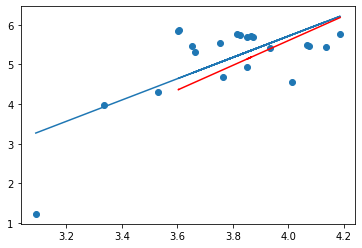

In [12]:
# Overall fit
plt.scatter(combined_data_log[[WantedVariable]],combined_data_log[["EV_Sales"]])
plt.plot(combined_data_log[[WantedVariable]], predictions_Y_OVA)
plt.plot(X_LNF_test,predictions_Y_LNF,color="red")
plt.show()

#red line are what happened if we take 75% of the data, fit and then use that to predict the 25% left

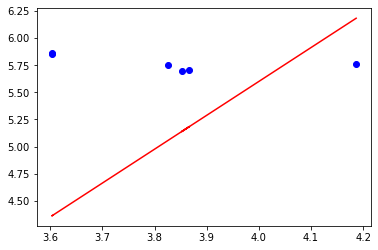

In [13]:
#close up on the testing data
#red line is what happened if we take 75% of the data, fit and then use that to predict the 25% left
plt.plot(X_LNF_test,predictions_Y_LNF,color="red")
plt.scatter(X_LNF_test,Y_LNF_test,color="blue")
plt.show()

In [14]:
# Error
Error_LNF = sum(abs(Y_LNF_test.to_numpy() - predictions_Y_LNF)) / Y_LNF_test.shape[0]
# Percentage Error
MError_LNF = (Error_LNF/np.average(abs(Y_LNF_test.to_numpy()))) * 100
print('Average Error: ',Error_LNF)
print('Percentage of Average Error to the Average Value of the Data: ',MError_LNF)

Average Error:  [0.86249332]
Percentage of Average Error to the Average Value of the Data:  [14.94980705]


In [15]:
## END REGULAR LINEAR FIT

In [16]:
# trying log regression instead of linear - didnt work
#model_OA_L = LogisticRegression().fit(Ci_by_year.reshape(-1, 1), Sales_sum.reshape(-1, 1).ravel())
#yplot_L = model_OA_L.predict(Ci_by_year.reshape(-1, 1))
#plt.plot(Ci_by_year.reshape(-1, 1), yplot_L)
#plt.scatter(Ci_by_year, Sales_sum)
#plt.show()

#FINE I GI VE UP

In [17]:
## END LINEAR FIT

In [18]:
## START POLYNOMIAL FIT

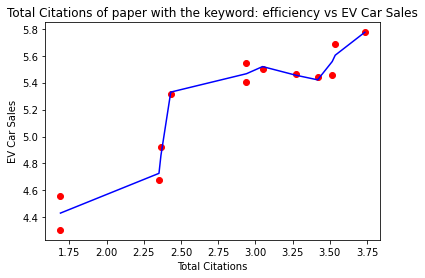

In [19]:
# do a poly fit for effeciency paper -------- CHEKC THIS AGAIN LATER
X_train_poly = train[["Keyword_Efficiency"]].iloc[2:,:]
Y_train_poly = train[["EV_Sales"]].iloc[2:,:]
X_test_poly = test[["Keyword_Efficiency"]]
Y_test_poly = test[["EV_Sales"]]


poly_reg=PolynomialFeatures(degree=7)
X_poly=poly_reg.fit_transform(X_train_poly)
poly_reg.fit(X_poly,Y_train_poly)
LF2=LinearRegression()
LF2.fit(X_poly,Y_train_poly)

plt.scatter(X_train_poly,Y_train_poly,color='red')
plt.plot(X_train_poly,LF2.predict(poly_reg.fit_transform(X_train_poly)),color='blue')
plt.title('Total Citations of paper with the keyword: efficiency vs EV Car Sales')
plt.xlabel('Total Citations')
plt.ylabel('EV Car Sales')
plt.show()

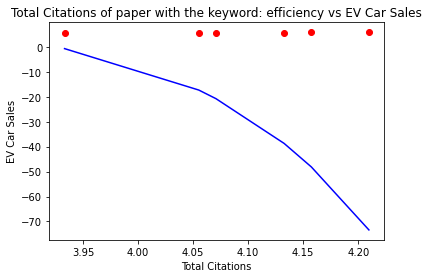

In [20]:
#Testing Data
plt.scatter(X_test_poly,Y_test_poly,color='red')
plt.plot(X_test_poly,LF2.predict(poly_reg.fit_transform(X_test_poly)),color='blue')
plt.title('Total Citations of paper with the keyword: efficiency vs EV Car Sales')
plt.xlabel('Total Citations')
plt.ylabel('EV Car Sales')
plt.show()

In [21]:
# Mean Error
Error_PLF = sum(abs(Y_test_poly.to_numpy() - LF2.predict(poly_reg.fit_transform(X_test_poly)))) / Y_test_poly.shape[0]
# Error compared to average value of the entire array
MError_PLF = (Error_PLF/np.average(abs(Y_test_poly.to_numpy()))) * 100
MError_PLF

print('Average Error: ',Error_PLF)
print('Percentage of Average Error to the Average Value of the Data: ',MError_PLF)

Average Error:  [38.94053528]
Percentage of Average Error to the Average Value of the Data:  [674.96579526]


In [22]:
## END POLYNOMIAL FIT

In [23]:
## START MULTIVARIABLES FIT

In [24]:
## Recapping variables:
#y: EV Sales: Sales_sum
#x: Ci_by_year, Ci_by_year_SEI, Ci_by_year_cathode, Ci_by_year_anode, Ci_by_year_efficiency, Ci_by_year_electrode, 
# Ci_by_year_5P

In [25]:

MultiLinear = LinearRegression()
#combined data is dataframe array

X_train = train[["Total Citations per Year","Keyword_SEI","Keyword_cathode","Keyword_anode","Keyword_Efficiency","Keyword_electrode","Ci_5IPub"]]
Y_train = train[["EV_Sales"]]

In [26]:
MultiLinear.fit(X_train.iloc[2:,:],Y_train.iloc[2:,:])

LinearRegression()

In [27]:
X_test = test[["Total Citations per Year","Keyword_SEI","Keyword_cathode","Keyword_anode","Keyword_Efficiency","Keyword_electrode","Ci_5IPub"]].values
Y_test = test[["EV_Sales"]].values


In [28]:
predictions_Lfit = MultiLinear.predict(X_test)
# Mean Error 
Error_MV = sum(abs(predictions_Lfit - Y_test))/test.shape[0]

#Mean_Error_avg
MError_MV = Error_MV / np.average(Y_test) * 100

print('Weights: ')
print(MultiLinear.coef_)
print('Intercept: ')
print(MultiLinear.intercept_)
print('Average Error: ',Error_MV)
print('Percentage of Average Error to the Average Value of the Data: ',MError_MV)

Weights: 
[[-5.82907703  0.02657156 -0.20898543 -0.23585407  0.65336476 -0.15497522
   7.13711686]]
Intercept: 
[0.01644511]
Average Error:  [0.32053019]
Percentage of Average Error to the Average Value of the Data:  [5.55582787]


In [29]:
np.average(Y_test)

5.769260538823352

In [30]:
Error_MV

array([0.32053019])

In [31]:
## END MULTIVARIABLE FIT

In [32]:
## START STOCHASTIC GRADIENT DESCENT

In [33]:
#X_test, X_train
#Y_test, Y_train
X_train_GD = X_train.iloc[2:,:]
Y_train_GD = Y_train.iloc[2:,:]
X_test_GD = test[["Total Citations per Year","Keyword_SEI","Keyword_cathode","Keyword_anode","Keyword_Efficiency","Keyword_electrode","Ci_5IPub"]]
Y_test_GD = test[["EV_Sales"]]

reg = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=5000, tol=1e-3))
reg.fit(X_train_GD, Y_train_GD)

C:\Users\thuyd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=5000))])

In [34]:
predictions_GD = reg.predict(X_test_GD)
predictions_GD

array([5.64222496, 5.73980943, 5.73430975, 5.51047533, 5.57829789,
       5.51236861])

In [35]:
Y_test_GD

,EV_Sales
15,5.756677
16,5.697598
17,5.704635
18,5.746984
19,5.847902
20,5.861767


In [36]:
# Mean Error
Error_GD = sum(sum(abs(Y_test_GD.to_numpy() - predictions_GD))) / Y_test_GD.shape[0]

# Mean Error compared to avg value
MError_GD = Error_GD / np.average(predictions_GD) * 100

print('Average Error: ',Error_GD)
print('Percentage of Average Error to the Average Value of the Data: ',MError_GD)

Average Error:  0.946001210009784
Percentage of Average Error to the Average Value of the Data:  16.834016817926283


In [37]:
## END STOCHASTIC GRADIENT DESCENT